In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:

# reflect an existing database into a new model
inspector = inspect(engine)
inspector.get_table_names()

# reflect the tables


['measurement', 'station']

In [6]:
# View all of the classes that automap found
Base = automap_base()
Base.prepare(autoload_with=engine)
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement= Base.classes.measurement
station= Base.classes.station

In [8]:
# reflect the tables
measurement_col = inspector.get_columns('measurement')
for c in measurement_col:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
station_col = inspector.get_columns('station')
for c in station_col:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.

session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_date)

2016-08-23


In [13]:
# Perform a query to retrieve the data and precipitation scores
prec_scores=session.query(measurement.date, measurement.prcp).filter(measurement.date >= '2016-08-23').order_by(measurement.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(prec_scores, columns=['date', 'Precipitation'])
#df=df.set_index('date')


In [15]:
# Sort the dataframe by date
#df.sort_index()
#df.sort_values('date')


In [16]:
#Removed the NaN values
#df = df.dropna(how='any')
#df

In [92]:
#df = df.dropna(how=any)

In [20]:
df = pd.DataFrame(prec_scores, columns=['date', 'Precipitation'])
df

,date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


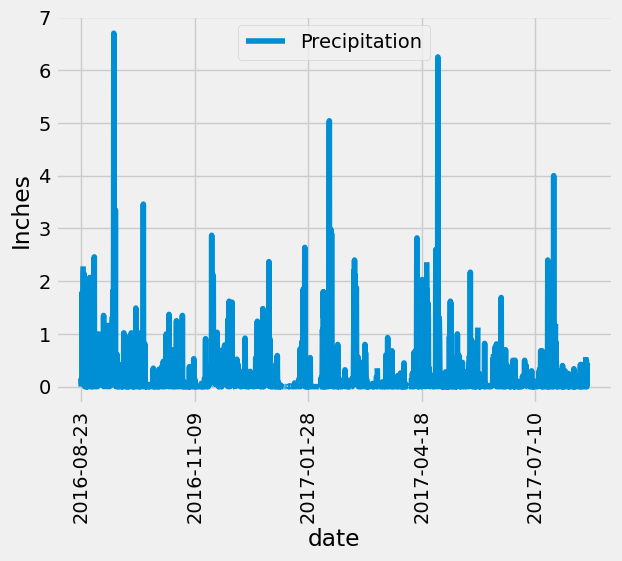

In [23]:
prec_scores=session.query(measurement.date, measurement.prcp).filter(measurement.date >= '2016-08-23').order_by(measurement.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(prec_scores, columns=['date', 'Precipitation'])
#df.sort_index()
df.sort_values('date')
df.set_index('date')
df.plot(x= 'date')
#https://stackoverflow.com/questions/24524104/pandas-describe-is-not-returning-summary-of-all-columns
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('Inches')
# precipitation_plot = df.plot( 
#                             x= 'date',
#                              y= 'Precipitation',
#                         kind="bar", color=["green"],
#                                    title="Precipitation for One Year",
                                
#                                    xlabel="Date",
#                                    ylabel="Inches")
#xticklabels = df.index
#plt.xticks(np.arange(min(precipitation_plot), max(precipitation_plot), 20.0))
#plt.axes().set_xticks(pos[::50])
#precipitation_plot.set_xticklabels(xticklabels, rotation=90, ha="right", wrap=True)
plt.show()


In [24]:


# # Use Pandas Plotting with Matplotlib to plot the data

# precipitation_plot = df.plot( 
#                             x= 'date',
#                              y= 'Precipitation',
#                         kind="bar", color=["green"],
#                                    title="Precipitation for One Year",
                                
#                                    xlabel="Date",
#                                    ylabel="Inches")
# #xticklabels = df.index
# #plt.xticks(np.arange(min(precipitation_plot), max(precipitation_plot), 20.0))
# #plt.axes().set_xticks(pos[::50])
# #precipitation_plot.set_xticklabels(xticklabels, rotation=90, ha="right", wrap=True)
# plt.show()


In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number stations in the dataset
total_station= session.query(station).distinct().count()
print(total_station)


9


In [27]:
total_station3=session.query(station)
print(total_station3)

SELECT station.id AS station_id, station.station AS station_station, station.name AS station_name, station.latitude AS station_latitude, station.longitude AS station_longitude, station.elevation AS station_elevation 
FROM station


In [28]:
for x in total_station3:
    print(x.name)

WAIKIKI 717.2, HI US
KANEOHE 838.1, HI US
KUALOA RANCH HEADQUARTERS 886.9, HI US
PEARL CITY, HI US
UPPER WAHIAWA 874.3, HI US
WAIMANALO EXPERIMENTAL FARM, HI US
WAIHEE 837.5, HI US
HONOLULU OBSERVATORY 702.2, HI US
MANOA LYON ARBO 785.2, HI US


In [33]:
#total_station2= pd.read_sql(session.query(station), session.bind)

In [34]:
#data = pd.read_sql("SELECT * FROM Census_Data", conn)

In [52]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# for x in locations:
#     print(x.name)

In [53]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
locations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
print(locations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [54]:
most_active_location=locations[0]
print(most_active_location)

('USC00519281', 2772)


In [60]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
location_active=session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station=="USC00519281").all()
print(location_active)                        

[(54.0, 85.0, 71.66378066378067)]


In [64]:
lowest_temp=location_active[0][0]
print(f"The lowest temperture at the most active location is {lowest_temp}")

The lowest temperture at the most active location is 54.0


In [63]:
highest_temp=location_active[0][1]
print(f"The hightest temperture at the most active location is {highest_temp}")

The hightest temperture at the most active location is 85.0


In [65]:
average_temp=location_active[0][2]
print(f"The average temperture at the most active location is {average_temp}")

The average temperture at the most active location is 71.66378066378067


In [66]:
# location_active=session.query(func.max(measurement.tobs)).filter(measurement.station=="USC00519281").all()
# print(location_active)      

In [76]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
location_year=session.query(measurement.tobs).filter(measurement.station=="USC00519281").filter(measurement.date>=year_date).all()
location_year_df=pd.DataFrame(location_year, columns=["Temperature"])

In [90]:
#location_year_df.plot(kind="hist")


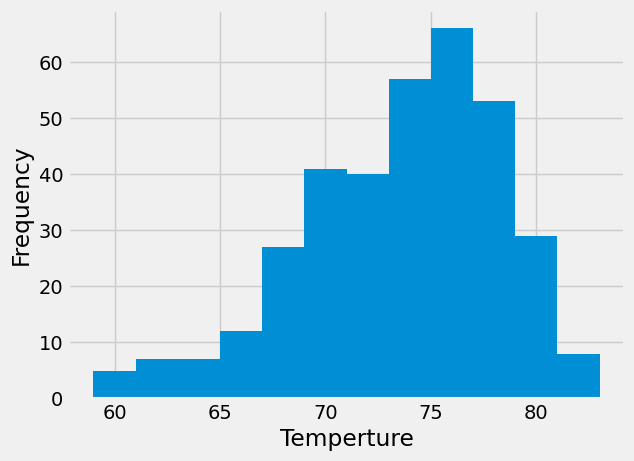

In [89]:

plt.hist(location_year_df["Temperature"], bins=12, label="temp")
#https://stackoverflow.com/questions/59482310/how-to-show-variable-names-as-labels-on-the-x-axis-of-a-histogram
plt.gca().set( xlabel='Temperture', ylabel='Frequency')

plt.show()

# Close session

In [91]:
# Close Session
session.close()